<a href="https://colab.research.google.com/github/ElisaVianey13/VIANEY/blob/main/ADL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import files
uploaded = files.upload()


Saving SUPERMARKET.xlsx to SUPERMARKET (1).xlsx


In [39]:
import pandas as pd
df = pd.read_excel("SUPERMARKET.xlsx")
df = df.drop(columns=["ID"])

In [40]:
# 1. Import libraries
import pandas as pd
import numpy as np

# 3. Ubah koma menjadi titik pada kolom numerik (karena data awal dari Excel Eropa)
for col in df.columns[2:]:  # Mulai dari kolom 'ampspent' (kolom ke-3) hingga akhir
    df[col] = df[col].astype(str).str.replace(",", ".").astype(float)

# 4. Tampilkan 5 data pertama
print("Contoh data:")
print(df.head())

# 5. Statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())

# Statistik Deskriptif Kategorik
# Cek tipe data kategorik (manual atau otomatis)

# --- ADDED CODE START ---
# Inspect the actual column names in the DataFrame
print("\nDataFrame Columns:")
print(df.columns)
# --- ADDED CODE END ---


categorical_cols = ['Supermarket', 'car', 'vegetari', 'kids', 'web']

print("\n📊 Statistik Deskriptif Kategorik:")
for col in categorical_cols:
    # --- MODIFIED CODE START ---
    # Check if the column exists in the DataFrame before processing
    if col in df.columns:
        print(f"\nKolom: {col}")
        print(df[col].value_counts())
        # Ensure mode() returns a value before accessing index 0
        mode_value = df[col].mode()
        if not mode_value.empty:
             print(f"Mode (nilai paling sering): {mode_value[0]}")
        else:
             print(f"Mode: Tidak ada nilai yang sering muncul") # Or handle appropriately if no mode
    else:
        print(f"\nKolom '{col}' tidak ditemukan dalam DataFrame.")
    # --- MODIFIED CODE END ---

# 6. Cek missing value
print("\nJumlah Missing Value per Kolom:")
print(df.isnull().sum())

Contoh data:
  Supermarket  amspent   meat  fish  vegetable  ownbrand  car  organic  \
0        Asda    42.13  10.32  2.39       4.14       4.1  1.0      0.0   
1        Asda    43.05   1.46  3.00       3.61      47.3  1.0      0.0   
2       Tesco    63.90   8.02  2.59      12.50      36.7  0.0      5.0   
3       Tesco    66.91   4.03  4.52      21.73      21.2  1.0     14.0   
4        Asda    67.02   2.10  5.76      21.46      31.4  0.0     15.0   

   vegetari  housesize  kids    tv  Radio  web    income   age  
0       0.0        1.0   0.0   6.0    9.0   0.0  31157.0  43.0  
1       0.0        3.0   0.0   1.0    2.0   1.0  53195.0  58.0  
2       0.0        1.0   0.0  12.0    5.0   0.0  38696.0  48.0  
3       0.0        3.0   2.0   0.0    4.0   0.0  42992.0  47.0  
4       0.0        1.0   0.0   1.0    0.0   0.0  32847.0  45.0  

Statistik Deskriptif:
          amspent        meat        fish   vegetable    ownbrand         car  \
count  150.000000  150.000000  150.000000  150.0

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


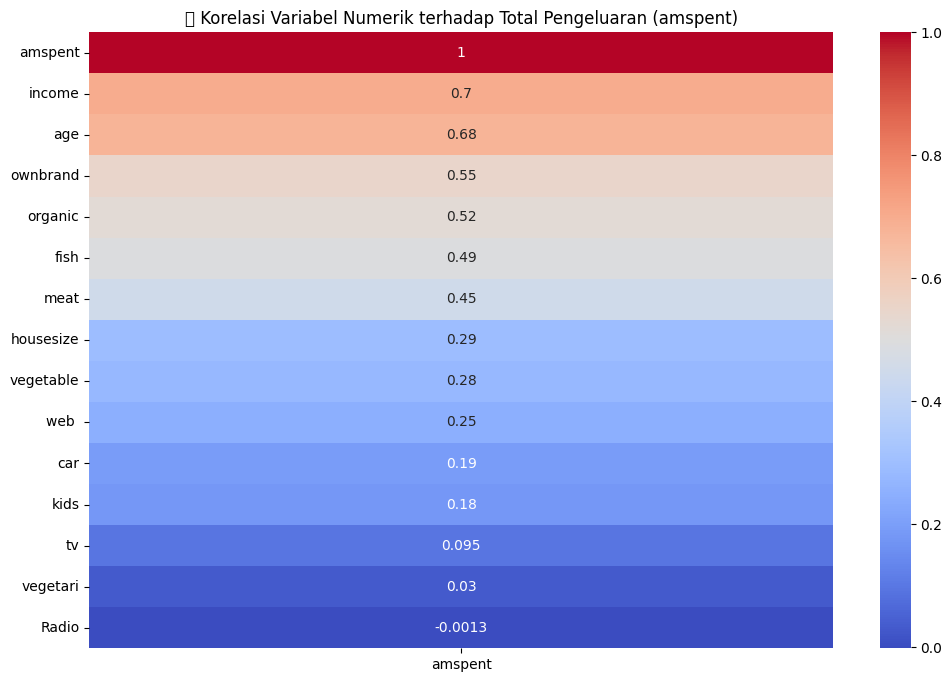

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


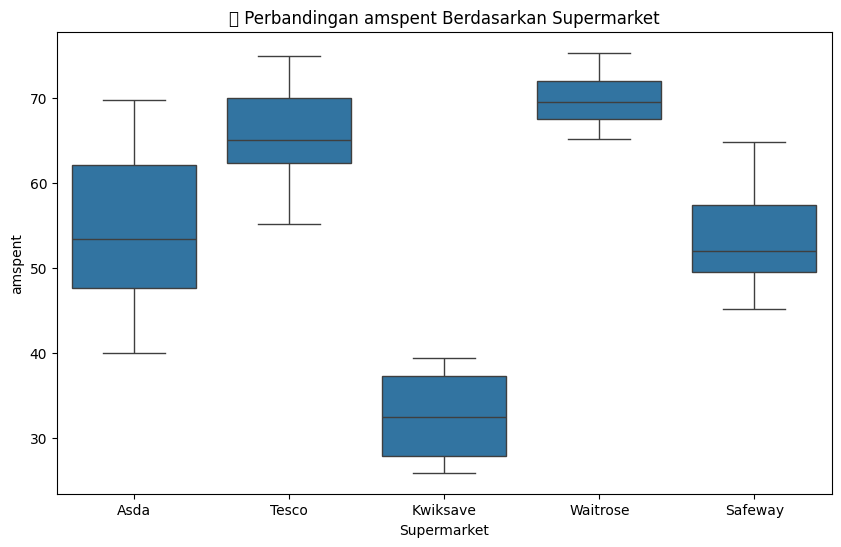

<ipython-input-41-c4090e18f344>:30: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


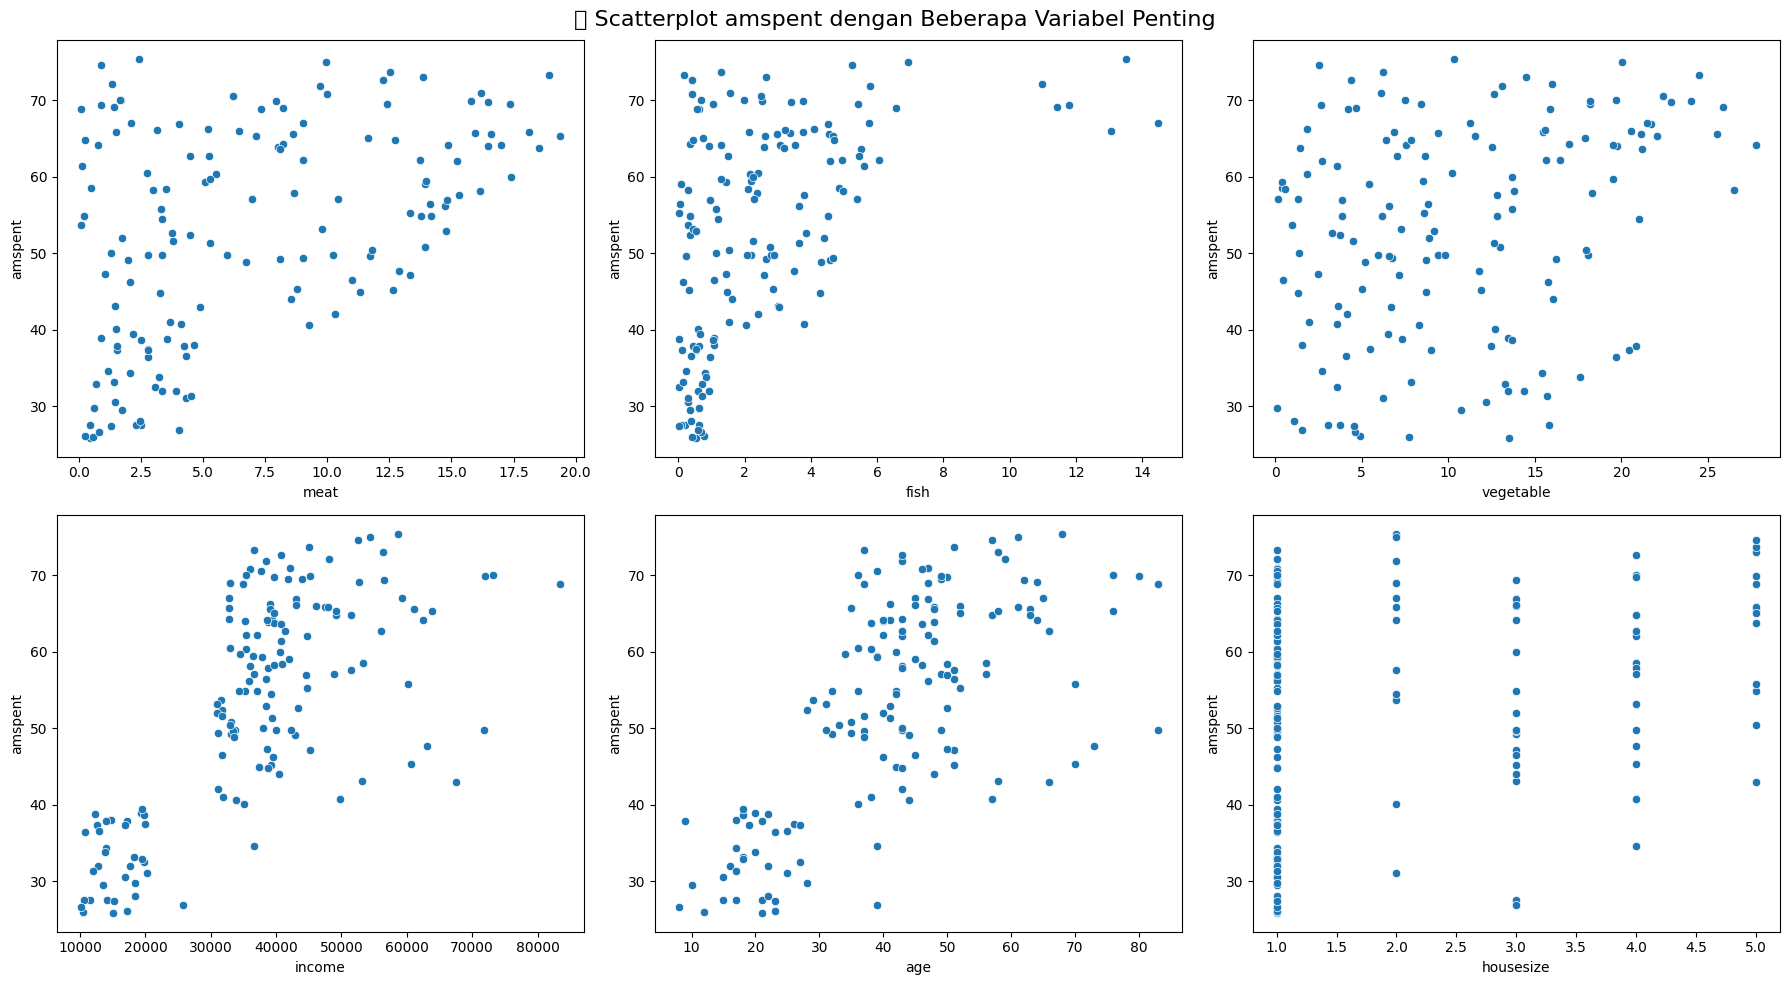

In [41]:
######Visualisasi##########

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Korelasi Numerik dengan amspent (heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True)[['amspent']].sort_values(by='amspent', ascending=False), annot=True, cmap='coolwarm')
plt.title("🔍 Korelasi Variabel Numerik terhadap Total Pengeluaran (amspent)")
plt.show()

# 2. Boxplot amspent berdasarkan Supermarket
plt.figure(figsize=(10, 6))
sns.boxplot(x='Supermarket', y='amspent', data=df)
plt.title("🛒 Perbandingan amspent Berdasarkan Supermarket")
plt.ylabel("amspent")
plt.show()

# 3. Scatterplot amspent vs variabel yang mungkin berpengaruh
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
sns.scatterplot(data=df, x='meat', y='amspent', ax=axs[0, 0])
sns.scatterplot(data=df, x='fish', y='amspent', ax=axs[0, 1])
sns.scatterplot(data=df, x='vegetable', y='amspent', ax=axs[0, 2])
sns.scatterplot(data=df, x='income', y='amspent', ax=axs[1, 0])
sns.scatterplot(data=df, x='age', y='amspent', ax=axs[1, 1])
sns.scatterplot(data=df, x='housesize', y='amspent', ax=axs[1, 2])
fig.suptitle("📈 Scatterplot amspent dengan Beberapa Variabel Penting", fontsize=16)
plt.tight_layout()
plt.show()

=== RINGKASAN REGRESI LINEAR ===
                            OLS Regression Results                            
Dep. Variable:                amspent   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     27.58
Date:                Tue, 20 May 2025   Prob (F-statistic):           7.70e-33
Time:                        04:20:25   Log-Likelihood:                -507.54
No. Observations:                 150   AIC:                             1045.
Df Residuals:                     135   BIC:                             1090.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.62

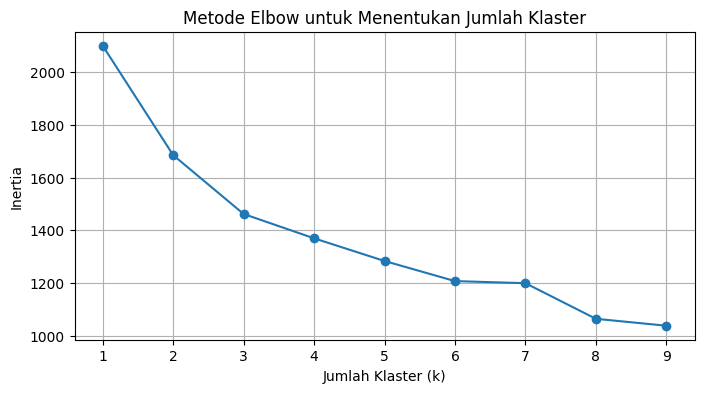

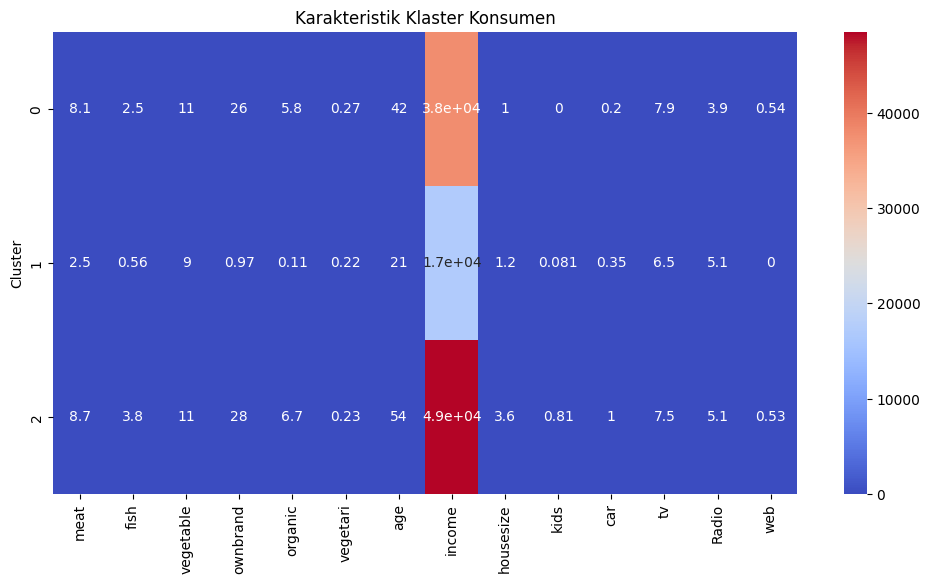


Jumlah anggota tiap klaster:
Cluster
2    57
0    56
1    37
Name: count, dtype: int64


In [42]:
# 1. Import library
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Baca file Excel (ganti dengan nama file Anda)
df = pd.read_excel("SUPERMARKET.xlsx")  # Ganti 'nama_file.xlsx' dengan file asli
df = df.drop(columns=["ID"])

# 3. Bersihkan kolom dan konversi numerik
df.columns = df.columns.str.strip()  # Hapus spasi di nama kolom
for col in df.columns:
    df[col] = df[col].astype(str).str.replace(",", ".")
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 4. Drop kolom kategorik 'Supermarket' dan baris kosong
if 'Supermarket' in df.columns:
    df = df.drop(columns=['Supermarket'])
df = df.dropna()

# ============================================
# === BAGIAN 1: REGRESI LINEAR PADA AMSPENT ===
# ============================================

# 5. Tentukan X (fitur) dan y (target)
X = df.drop(columns=['amspent'])
y = df['amspent']

# 6. Tambah konstanta
X = sm.add_constant(X)

# 7. Bangun model regresi linear
model = sm.OLS(y, X).fit()

# 8. Tampilkan hasil regresi
print("=== RINGKASAN REGRESI LINEAR ===")
print(model.summary())

# ===============================================
# === BAGIAN 2: SEGMENTASI KONSUMEN (K-MEANS) ===
# ===============================================

# 9. Pilih fitur relevan untuk segmentasi
features_segmentasi = ['meat', 'fish', 'vegetable', 'ownbrand', 'organic', 'vegetari',
                       'age', 'income', 'housesize', 'kids', 'car', 'tv', 'Radio', 'web']

df_seg = df[features_segmentasi].copy()

# 10. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_seg)

# 11. Metode Elbow untuk cari jumlah klaster
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Jumlah Klaster')
plt.grid(True)
plt.show()

# 12. K-Means dengan k=3 (atau sesuai hasil Elbow)
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df_seg['Cluster'] = kmeans.fit_predict(X_scaled)

# 13. Analisis Klaster
cluster_summary = df_seg.groupby('Cluster').mean()

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary, annot=True, cmap='coolwarm')
plt.title("Karakteristik Klaster Konsumen")
plt.show()

# 14. (Opsional) Lihat distribusi klaster
print("\nJumlah anggota tiap klaster:")
print(df_seg['Cluster'].value_counts())
